In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include a single channel (for grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


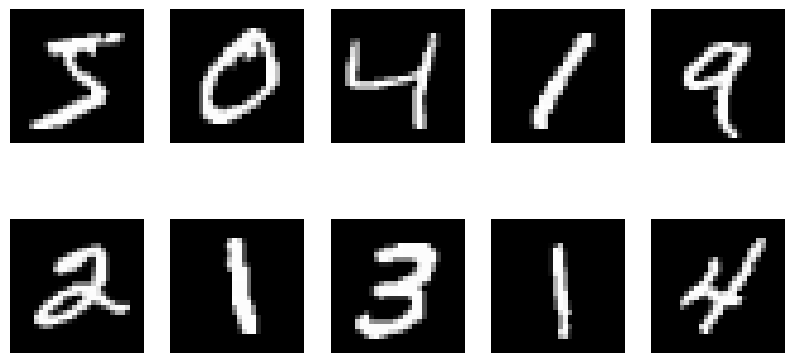

In [5]:
# Plot some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [6]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 22s 56ms/step - loss: 0.3530 - accuracy: 0.8924 - val_loss: 0.1015 - val_accuracy: 0.9695
Epoch 2/5
375/375 [==============================] - 21s 55ms/step - loss: 0.1180 - accuracy: 0.9646 - val_loss: 0.0630 - val_accuracy: 0.9788
Epoch 3/5
375/375 [==============================] - 19s 51ms/step - loss: 0.0844 - accuracy: 0.9748 - val_loss: 0.0505 - val_accuracy: 0.9851
Epoch 4/5
375/375 [==============================] - 20s 54ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 5/5
375/375 [==============================] - 20s 54ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0446 - val_accuracy: 0.9869


In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0357 - accuracy: 0.9875
Test Loss: 0.03568481281399727
Test Accuracy: 0.987500011920929


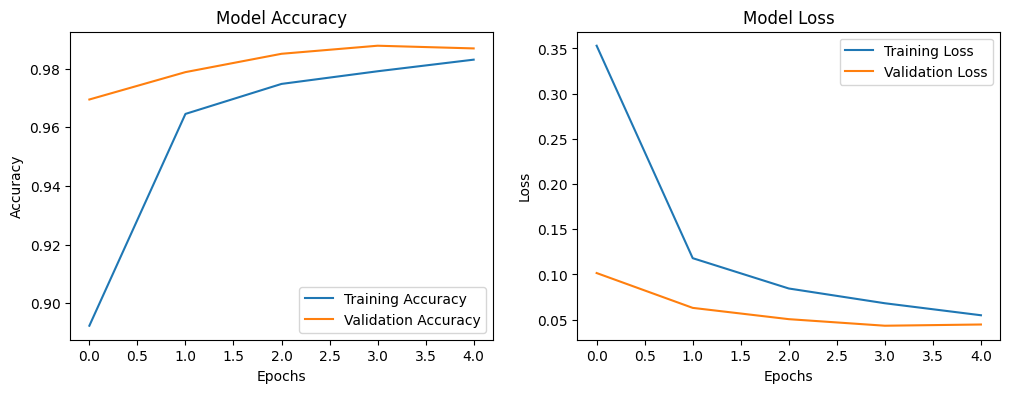

In [9]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


313/313 [==============================] - 2s 5ms/step


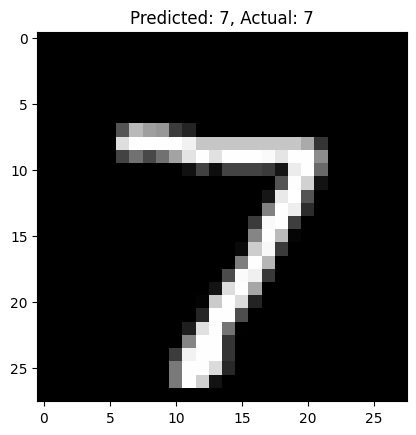

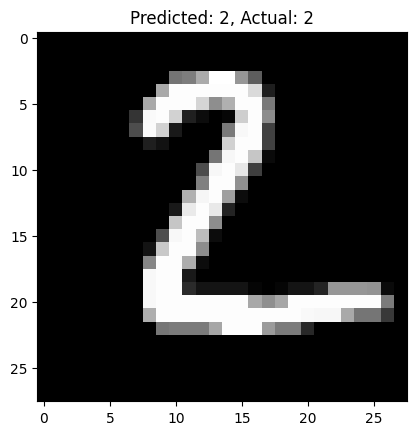

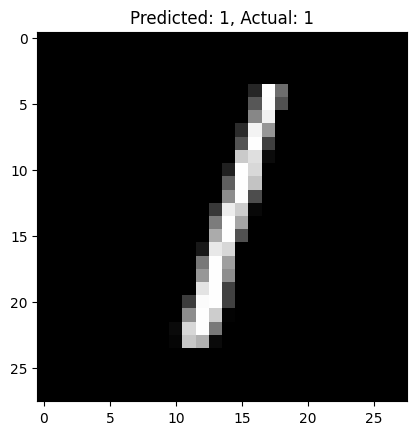

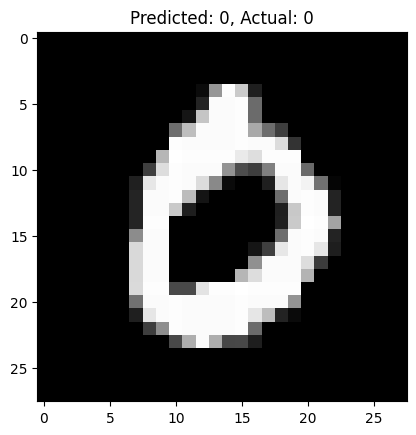

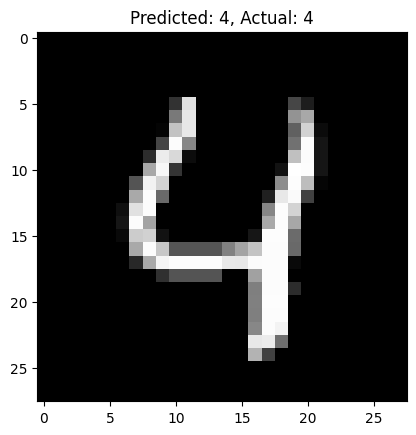

In [10]:
# Predict on the test set
predictions = model.predict(X_test)

# Display some predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()


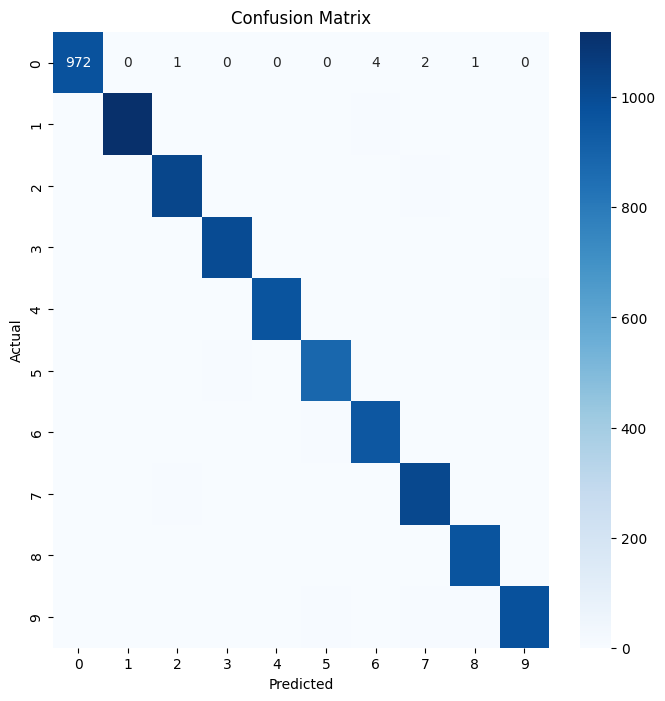

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

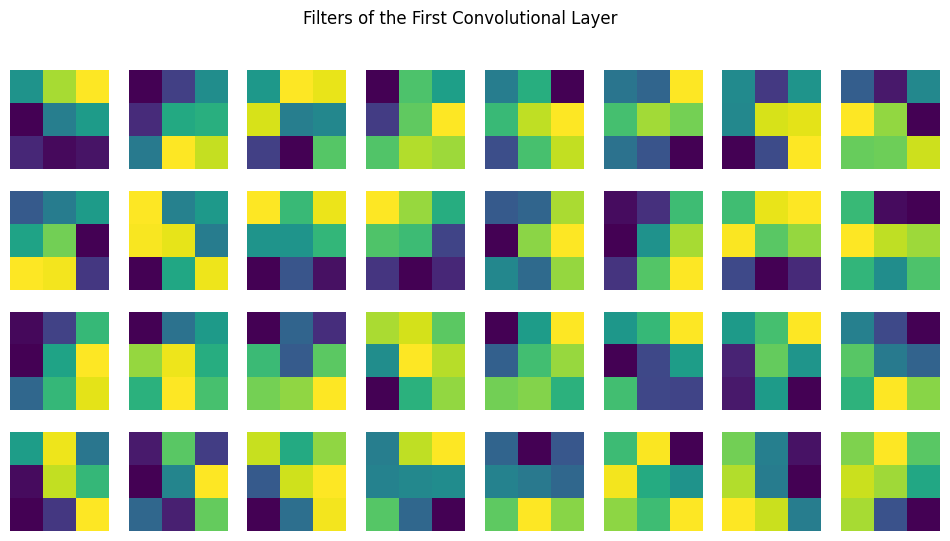

In [12]:
# Visualizing Filters of the First Convolutional Layer
filters, biases = model.layers[0].get_weights()
filters = (filters - filters.min()) / (filters.max() - filters.min())  # Normalize filter values

# Plot all filters
n_filters = filters.shape[-1]  # Number of filters
fig, axs = plt.subplots(4, 8, figsize=(12, 6))
axs = axs.ravel()

for i in range(n_filters):
    axs[i].imshow(filters[:, :, 0, i], cmap='viridis')
    axs[i].axis('off')

plt.suptitle('Filters of the First Convolutional Layer')
plt.show()